In [2]:
import numpy as np
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn import manifold , datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [3]:
# Generating Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

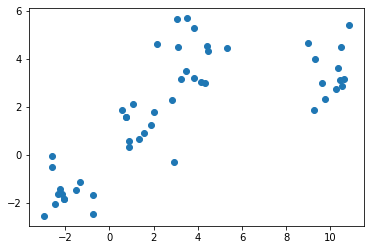

In [4]:
# Plot the scatter plot of the randomly generated data.
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [5]:
# Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

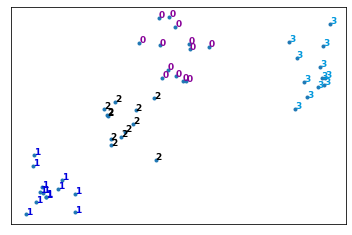

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [8]:
# Dendrogram associated for the agglomerative hierarchical clustering
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.47698611 0.51588388 ... 0.63724407 0.81019311 0.12894157]
 [0.47698611 0.         0.05148056 ... 1.02748132 1.22379052 0.55562506]
 [0.51588388 0.05148056 0.         ... 1.07696465 1.27252553 0.60011461]
 ...
 [0.63724407 1.02748132 1.07696465 ... 0.         0.20369729 0.51200564]
 [0.81019311 1.22379052 1.27252553 ... 0.20369729 0.         0.69126684]
 [0.12894157 0.55562506 0.60011461 ... 0.51200564 0.69126684 0.        ]]


In [9]:
z= hierarchy.linkage(dist_matrix,'complete')

<ipython-input-9-c6a0384ee102>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z= hierarchy.linkage(dist_matrix,'complete')


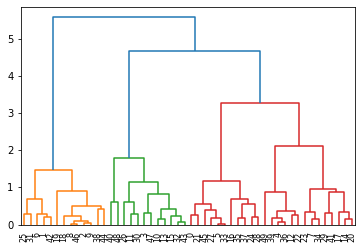

In [10]:
dendro = hierarchy.dendrogram(z)

In [11]:
# clustering on vehicle dataset 
pdf = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv")
print(" shape of dataset: ", pdf.shape)
pdf.head()

 shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [12]:
# feature selection
featureset = pdf[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]